## Using MECSim
In this example we look at a simple example case of single electron trasnfer mechanism. We simulate Cyclic Voltametry response of this particualr mechanism with a planar electrode assumption.

In [1]:
from pymecsim import *
import warnings
warnings.filterwarnings('ignore')
import pdb
import matplotlib.pyplot as plt
import numpy as np
import os

pymecsim provides a python interface to define and simulate a mechanism. A simple reaction mechanism can be simulated using the following lines of code.

Let us build mechanism using the pymecsim input parser. 

We want to use the following mechanism : `A + e =B , B + C = A + D`. We need the following details to simulate this mechanism.

## 1. Create 4 chemical species involved in the reaction

In [2]:
A = Specie('A', C0=1e-6)
B = Specie('B')
C = Specie('C')
D = Specie('D')
species = [A, B, C, D]

## 2. Create two reactions of the species generated above

In [3]:
R1 = ChargeTransfer([(A,1),('e',1)],[(B,1)],E0=0.0, ks=1.0e1)
R2 = ChemicalReaction([(B,1),(C,1)],[(A,1),(D,1)], kf=1e8, kb=1e-5)

rxn = [R1, R2]

## 3. Make a mechanism out of the created reactions and species

In [4]:
mech = Mechanism(rxn)
print(mech)

Charge Transfer : 1 A + 1 e <=> 1 B  ks= 1.00e+01, E0 = 0.00e+00, alpha = 5.00e-01
Chemical Reaction : 1 B + 1 C <=> 1 A + 1 D  kf= 1.00e+08, kb= 1.00e-05 



## 4. Define a custom voltammetry loading

In [5]:
cv = DCVoltammetry(E_start = 0.5, E_rev=-0.5, nu=1.0e0)
volt = Voltammetry(objs=[cv])
exp = Experiment(mech, voltammetry=volt)

## 5. Use the MECSIM wrapper to simulate the experiment and plot the CV curve

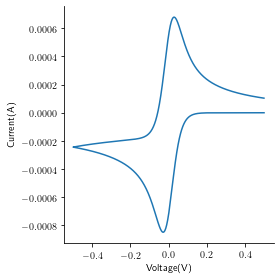

In [6]:
sim = MECSIM(exp=exp)
sim.solve()
sim.plot()
plt.show()

We can visualize the concentration profiles of the species in the bulk and at the surface. In this example, we simulated `A +1e = B` thus we have two species. Since this is a simple one step reaction mechanism and diffusin driven, we should see that increase in concentration of species `A` should lead to decrease in concentration of species `B` at the surface where the electron transfer takes place. Similarily in the bulk, one should observe similar behavior upuntil a `diffusion layer` length scale.

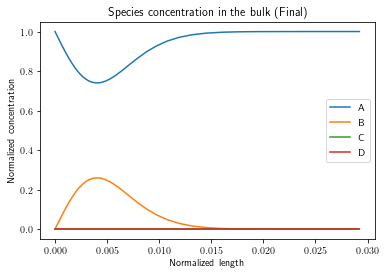

In [7]:
species = exp.mechanism.species

C_bulk = sim.get_bulk_concentrations()

fig, ax = plt.subplots()

for s in species:
    ax.plot(C_bulk['x'], C_bulk[s.name], label=s.name)
ax.set_xlabel('Normalized length')
ax.set_ylabel('Normalized concentration')
ax.legend()
ax.set_title('Species concentration in the bulk (Final)')
plt.show()

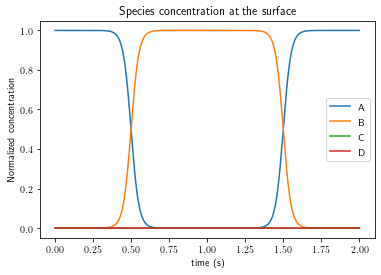

In [8]:
C_surface = sim.get_surface_concentrations()
fig, ax = plt.subplots()

for s in species:
    ax.plot(C_surface['T'], C_surface[s.name], label=s.name)
ax.set_xlabel('time (s)')
ax.set_ylabel('Normalized concentration')
ax.legend()
ax.set_title('Species concentration at the surface')

plt.show()

If you're familiar with the original MECSim inteface, you can also pass on `.inp` files as input. 
Below is an example of how to use a skeleton file in `../mechanisms/cvexamples.sk` and simulate three CV curves using the utility function `pysed`

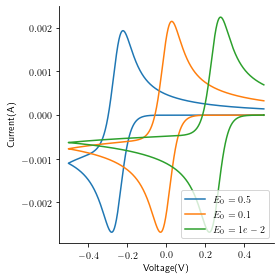

In [9]:
configfile  = '../mechanisms/cvexamples.sk'
E0 = [-0.25,0.0,0.25]
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
dirname = os.getcwd()
for i,e0 in enumerate(E0):
    outfile = dirname + '/outfile.sk'
    pysed('$E0', str(e0), configfile, outfile)
    model = MECSIM(outfile)
    model.solve()
    T = model.T
    forward_sweep = np.arange(len(T)/2,len(T)).astype(int)
    model.plot(ax=ax)
    ax.set_label("E0 = "+str(e0))
plt.legend([r'$E_0=0.5$',r'$E_0=0.1$',r'$E_0=1e-2$'],loc='lower right')
plt.show()